数据类型检查：
Elevaton           int64
Slope              int64
Aspect             int64
Curvature          int64
TWI              float64
SPI              float64
LUT                int64
Distance         float64
Soil moisture    float64
CTI              float64
Roughness        float64
VRM              float64
TPI              float64
label              int64
dtype: object
Confusion Matrix:
[[2657    1]
 [ 138    0]]
Accuracy: 0.9503
Average Confidence: 0.9722
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000
Log Loss: 0.2311
Cohen's Kappa: -0.0007
MSE: 0.0497
RMSE: 0.2230

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      2658
           1       0.00      0.00      0.00       138

    accuracy                           0.95      2796
   macro avg       0.48      0.50      0.49      2796
weighted avg       0.90      0.95      0.93      2796



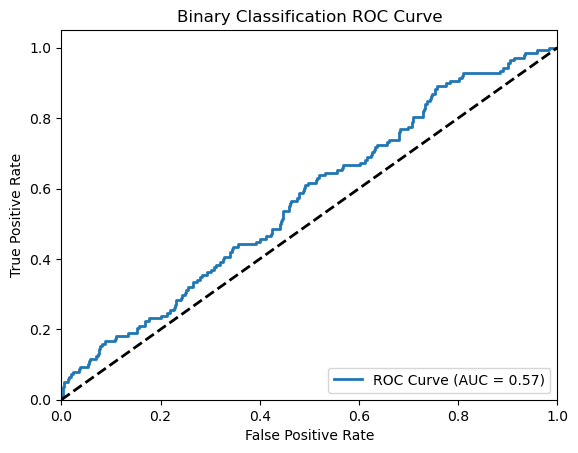

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, cohen_kappa_score, log_loss,
    classification_report, roc_auc_score, roc_curve,
    mean_squared_error
)

# 1. 读取数据
data = pd.read_excel(r"C:\Users\la136\Desktop\因子识别.xlsx",sheet_name='123_4')
target_column = "label"  # 目标变量

# 2. 检查数据类型
print("数据类型检查：")
print(data.dtypes)

# 3. 编码字符串列
label_encoder = LabelEncoder()
if data[target_column].dtype == 'object':
    data[target_column] = label_encoder.fit_transform(data[target_column])

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# 确认是否为二分类
unique_classes = data[target_column].unique()
if len(unique_classes) != 2:
    raise ValueError("当前数据不是二分类，请确保 label 只有两个唯一值。")

# 4. 划分训练/测试集
train_dataset, test_dataset = train_test_split(
    data,
    test_size=0.3,
    stratify=data[target_column]
)

X_train = train_dataset.drop(columns=[target_column])
y_train = train_dataset[target_column]
X_test = test_dataset.drop(columns=[target_column])
y_test = test_dataset[target_column]

# 5. 模型初始化和训练
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

model.fit(X_train, y_train)

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


# 6. 预测
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # 二分类：取正类的概率

# 7. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 8. 指标评估
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred_proba)
kappa = cohen_kappa_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 置信度得分
confidence_scores = []
for i, pred in enumerate(y_pred):
    confidence = y_pred_proba[i] if pred == 1 else 1 - y_pred_proba[i]
    confidence_scores.append(confidence)
average_confidence = np.mean(confidence_scores)

# 打印评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Confidence: {average_confidence:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. ROC 曲线绘制（二分类）
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Binary Classification ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [1]:
import pandas as pd

# 读取Excel文件
excel_file = r'C:\Users\la136\Desktop\HI_Fuzzy_Rules.xlsx'  # 替换为你的Excel文件路径
df = pd.read_excel(excel_file)

# 将数据保存为CSV文件
csv_file = r'C:\Users\la136\Desktop\HI_Fuzzy_Rules.csv'  # 替换为你想保存的CSV文件路径
df.to_csv(csv_file, index=False)

print(f"Excel文件已成功转换为CSV，保存为 {csv_file}")


Excel文件已成功转换为CSV，保存为 C:\Users\la136\Desktop\HI_Fuzzy_Rules.csv


In [40]:
import pandas as pd

# 1. 读取原始 Excel 文件
file_path = r"C:\Users\la136\Desktop\数据原始.xlsx"
data = pd.read_excel(file_path, sheet_name='1和2合并')

# 2. 随机抽取 461 条数据（不放回）
sampled_data = data.sample(n=4000, random_state=42)  # 设置随机种子确保结果可复现

# 3. 保存为新 Excel 文件
output_path = r"C:\Users\la136\Desktop\1and2.xlsx"
sampled_data.to_excel(output_path, index=False)

print(f"已成功随机抽取 461 条数据并保存到：{output_path}")


已成功随机抽取 461 条数据并保存到：C:\Users\la136\Desktop\1and2.xlsx


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, average_precision_score,
    cohen_kappa_score, mean_squared_error
)
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# ========== 1. 加载数据 ==========
data = pd.read_excel(r"C:\Users\la136\Desktop\因子识别.xlsx", sheet_name='123_4')
# data = pd.read_excel(r"C:\Users\la136\Desktop\极限.xlsx")
target_column = "label"

# ========== 2. 编码非数值列 ==========
label_encoder = LabelEncoder()
if data[target_column].dtype == 'object':
    data[target_column] = label_encoder.fit_transform(data[target_column])

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop(columns=[target_column])
y = data[target_column]

# ========== 3. 设置模型和交叉验证 ==========
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ========== 4. 初始化结果存储 ==========
metrics = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'roc_auc': [],
    'log_loss': [],
    'specificity': [],
    'average_precision': [],
    'cohen_kappa': [],
    'mse': [],
    'rmse': [],
    'confidence': []
}

# ========== 5. 交叉验证 ==========
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # 预测概率（正类概率）
    y_pred_proba = y_prob[:, 1]

    # 混淆矩阵
    cm = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel() if cm.shape == (2, 2) else (0, 0, 0, 0)

    # 评估指标
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, zero_division=0))
    metrics['f1'].append(f1_score(y_test, y_pred, zero_division=0))
    metrics['roc_auc'].append(roc_auc_score(y_test, y_pred_proba))
    metrics['log_loss'].append(log_loss(y_test, y_pred_proba))
    metrics['specificity'].append(TN / (TN + FP) if (TN + FP) > 0 else 0)
    metrics['average_precision'].append(average_precision_score(y_test, y_pred_proba))
    metrics['cohen_kappa'].append(cohen_kappa_score(y_test, y_pred))
    mse = mean_squared_error(y_test, y_pred)
    metrics['mse'].append(mse)
    metrics['rmse'].append(np.sqrt(mse))

    # 平均置信度
    confidence_scores = [y_prob[i, pred] for i, pred in enumerate(y_pred)]
    metrics['confidence'].append(np.mean(confidence_scores))

# ========== 6. 输出结果 ==========
print("\n===== 交叉验证平均指标（5折）=====")
for key in metrics:
    print(f"{key.capitalize():<20}: {np.mean(metrics[key]):.4f} ± {np.std(metrics[key]):.4f}")



===== 交叉验证平均指标（5折）=====
Accuracy            : 0.9495 ± 0.0006
Precision           : 0.0500 ± 0.1000
Recall              : 0.0022 ± 0.0043
F1                  : 0.0042 ± 0.0083
Roc_auc             : 0.5661 ± 0.0190
Log_loss            : 0.2355 ± 0.0027
Specificity         : 0.9988 ± 0.0007
Average_precision   : 0.0653 ± 0.0038
Cohen_kappa         : 0.0017 ± 0.0076
Mse                 : 0.0505 ± 0.0006
Rmse                : 0.2248 ± 0.0014
Confidence          : 0.9716 ± 0.0013


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, log_loss, confusion_matrix, average_precision_score,
    cohen_kappa_score, mean_squared_error, roc_curve
)
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, average_precision_score, confusion_matrix
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from interpret.glassbox import ExplainableBoostingClassifier

数据类型检查：
Elevaton           int64
Slope              int64
Aspect             int64
Curvature          int64
TWI              float64
SPI              float64
LUT                int64
Distance         float64
Soil moisture    float64
CTI              float64
Roughness        float64
VRM              float64
TPI              float64
label              int64
dtype: object
Confusion Matrix:
[[1360  139   42    5]
 [ 613   80   17    2]
 [ 344   41   13    2]
 [ 113   20    3    2]]
Accuracy: 0.5204
Average Confidence: 0.6098
Macro Precision: 0.3001
Macro Recall: 0.2598
Macro F1-Score: 0.2317
Log Loss: 1.1934
Cohen's Kappa: 0.0210
MSE: 1.2550
RMSE: 1.1203

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.88      0.68      1546
           1       0.29      0.11      0.16       712
           2       0.17      0.03      0.05       400
           3       0.18      0.01      0.03       138

    accuracy                           0.52  

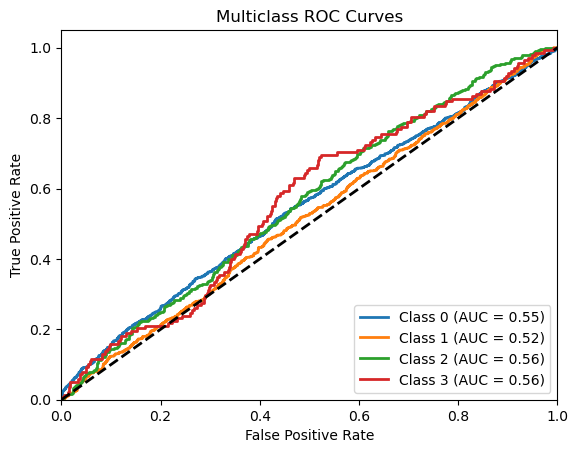

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, cohen_kappa_score, log_loss,
    classification_report, roc_auc_score, roc_curve, auc
)
from sklearn.metrics import mean_squared_error

# 1. 读取数据
data = pd.read_excel(r"C:\Users\la136\Desktop\123和4.xlsx")
# data= pd.read_excel(r"C:\Users\la136\Desktop\4000.xlsx")
target_column = "label"  # 你的目标变量列

# 2. 检查数据类型
print("数据类型检查：")
print(data.dtypes)

# 3. 编码字符串列
label_encoder = LabelEncoder()
if data[target_column].dtype == 'object':
    data[target_column] = label_encoder.fit_transform(data[target_column])

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

# 4. 划分训练/测试集
train_dataset, test_dataset = train_test_split(
    data,
    test_size=0.3,
    stratify=data[target_column],
    random_state=42
)

X_train = train_dataset.drop(columns=[target_column])
y_train = train_dataset[target_column]
X_test = test_dataset.drop(columns=[target_column])
y_test = test_dataset[target_column]

# 5. 模型初始化和训练
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)
# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# 6. 预测
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

# 7. 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# 8. 指标评估
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
logloss = log_loss(y_test, y_pred_proba)
kappa = cohen_kappa_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# 置信度得分
confidence_scores = []
for i, pred in enumerate(y_pred):
    confidence_scores.append(y_pred_proba[i, pred])
average_confidence = np.mean(confidence_scores)

# 打印评估结果
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Confidence: {average_confidence:.4f}")
print(f"Macro Precision: {precision:.4f}")
print(f"Macro Recall: {recall:.4f}")
print(f"Macro F1-Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 9. 多分类ROC绘图（每个类 vs 其他类）
n_classes = len(np.unique(y_test))
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 绘图
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curves')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# 1. 加载数据
# data = pd.read_excel(r"C:\Users\la136\Desktop\实验一数据.xlsx", sheet_name='全初始') 
data = pd.read_excel(r"C:\Users\la136\Desktop\OtoO.xlsx", sheet_name='123和4')
target_column = "label"

# 2. 编码非数值列
label_encoder = LabelEncoder()
if data[target_column].dtype == 'object':
    data[target_column] = label_encoder.fit_transform(data[target_column])

categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

X = data.drop(columns=[target_column])
y = data[target_column]

# 3. 初始化模型和交叉验证
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# # 定义 LSTM 模型
# model = Sequential()

# # 添加 LSTM 层
# model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))

# # 添加 Dropout 层以减少过拟合
# model.add(Dropout(0.2))

# # 添加输出层
# model.add(Dense(units=1, activation='sigmoid'))  # 如果是二分类问题，使用 sigmoid；多分类用 softmax

# # 编译模型
# model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])  # 适应二分类问题

# # 训练模型
# model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 4. 执行交叉验证，获取准确率列表
accuracy_list = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# 5. 输出准确率结果
print("每一折的准确率：", accuracy_list)
print("平均准确率：", np.mean(accuracy_list))
print("标准差：", np.std(accuracy_list))

每一折的准确率： [0.8362069  0.86956522 0.86086957 0.86956522 0.83478261]
平均准确率： 0.8541979010494751
标准差： 0.015604164481904659
